# Regresión Lineal
La regresión lineal es uno de los métodos mas antiguos de Aprendizaje Supervisado. La regresión lineal se basa en el principio subyacente que las variables independientes (predictores o features) se relacionan en forma lineal a efectos de generar el valor de la variable dependiente. Además de permitirnos predecir la variable independiente, también nos permite identificar cuales son las variables dependientes que mas impactan en el valor de la variable a predecir.

## Modelo subyacente
El modelo subycente a una regresión lineal consiste en una combinación lineal de todos los predictores:
#### Modelo de regresión lineal simple (un predictor): 
\begin{equation*}
y = \theta_{0} + \theta_{1} \cdot x_{1} + \epsilon
\end{equation*}

Con:

\begin{equation*}
\hat{y} = \theta_{0} + \theta_{1} \cdot x{1}
\end{equation*}

#### Modelo de regresión lineal múltiple (muchos predictores):
\begin{equation*}
y = \theta_{0} + \sum_{i=1}^{n}(\theta_{i} \cdot x_{i}) + \epsilon
\end{equation*}

Con:

\begin{equation*}
\hat{y} = \theta_{0} + \sum_{i=1}^{n}(\theta_{i} \cdot x_{i}) 
\end{equation*}

Donde:
- $\hat{y}$ es el valor predicho (la estimación de la variable independiente).
- $n$ es el número de variables dependientes.
- $x_{i}$ es la $ith$ variable dependiente.
- $\theta_{j}$ es el $jth$ parámetro del modelo. Incluye el bias (sesgo o término independiente) y los coeficientes de todas las variables dependientes.
- $\epsilon$ es el error (aleatorio) en la predicción.

Usualmente, en Machine Learning la notación anterior (notación normal) no es muy usada. Se prefiere la notación vectorial porque permite expresiones mucho mas compactas:

\begin{equation*}
\hat{\vec{y}} = \vec{θ}^{T} \cdot \vec{X}
\end{equation*}

Donde:
- $\vec{θ}$ es el vector fila de parámetros del modelo. Incluye el bias (sesgo o término independiente) y los coeficientes de todas las variables dependientes.
- $\vec{θ}^{T}$ es el transpuesto del vector $\vec{θ}$ (o sea, un vector columna).
- $\vec{X}$ es el vector fila de variables independientes. Para poder multiplicarlo por $\vec{θ}^{T}$, se agrega la componente inicial correspoendiente al bias ($\theta_{0}$), la cual vale siempre $1$.
- $\vec{θ}^{T} \cdot \vec{X}$ es el producto escalar entre $\vec{X}$ y $\vec{θ}^{T}$.
- $\hat{y}$ es la predicción (un escalar).

### Caracterización de un modelo de regresión lineal
Ya sabida la forma en que se combinan los predictores, un modelo de regresión lineal se puede caracterizar completamente por $\vec{θ}$. Es decir, a efectos de predecir el valor de $y$ (es decir, calcular $\hat{y}$) solo necesitamos conocer $\theta$ y multiplicar su transpuesto por el vector de los valores de los predictores.

## Entrenamiento del modelo (cálculo de $\vec{\theta}$)
En un problema de Aprendizaje Supervisado, partimos de un conjunto de $m$ observaciones de parejas de $\vec{X}$ e $y$. Recordemos que $\vec{X}$ es un vector fila, entonces, colocando un vector $\vec{X}$ abajo de otro podemos crear la matriz de observaciones $\textbf{X}^{mx(n+1)}$ en el cual cada una de las $m$ filas es una observación (o muestra) y cada una de las $n+1$ columnas un predictor (la primera columna es la constante $1$). O sea, si tenemos:

\begin{equation*}
\vec{X}^{1} = (x_{1}^{1}, x_{2}^{1}, \cdots  , x_{n}^{1})  \\
\vec{X}^{2} = (x_{1}^{2}, x_{2}^{2}, \cdots  , x_{n}^{2})  \\
\vdots  \\
\vec{X}^{m} = (x_{1}^{m}, x_{2}^{m}, \cdots  , x_{n}^{m})  \\
\end{equation*}

Podemos escribirlo en forma matricial como:
\begin{equation*}
\textbf{X} = 
  \begin{bmatrix}
    1 & x_{1}^{1} & x_{2}^{1} & \cdots & x_{n}^{1} \\
    1 & x_{1}^{2} & x_{2}^{2} & \cdots & x_{n}^{2} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{1}^{m} & x_{2}^{m} & \cdots & x_{n}^{m} \\
  \end{bmatrix}
\end{equation*}

En forma similar, podemos transformar las $m$ observaciones de $y$ en un vector columna $\vec{y}$ de $m$ dimensiones:

\begin{equation*}
\vec{y} = 
  \begin{bmatrix}
    y^{1} \\
    y^{2} \\
    \vdots \\
    y^{m} \\
  \end{bmatrix}
\end{equation*}

Por las definiciones dadas en la sección anterior, $\vec{y}$ es equivalente a:

\begin{equation*}
\vec{y} = \vec{\hat{y}} + \vec{e} = \textbf{X}\vec{\theta}^{T} + \vec{\epsilon}
\end{equation*}


O en su forma explícita:

\begin{equation*}
 \begin{bmatrix}
    y^{1} \\
    y^{2} \\
    \vdots \\
    y^{m} \\
 \end{bmatrix}  
 = 
 \begin{bmatrix}
    1 & x_{1}^{1} & x_{2}^{1} & \cdots & x_{n}^{1} \\
    1 & x_{1}^{2} & x_{2}^{2} & \cdots & x_{n}^{2} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{1}^{m} & x_{2}^{m} & \cdots & x_{n}^{m} \\
 \end{bmatrix}
 \begin{bmatrix}
     \theta_{0} \\
     \theta_{1} \\
     \theta_{2} \\ 
     \cdots \\
     \theta_{n}
 \end{bmatrix} 
 +
 \begin{bmatrix}
    \epsilon^{1} \\
    \epsilon^{2} \\
    \vdots \\
    \epsilon^{m} \\
 \end{bmatrix}  
\end{equation*}

Donde $\vec{\epsilon}$ es el vector de los errores o diferencias de cada valor predicho respecto del valor muestreado. Siendo $\vec{y}$ y $\textbf{X}$ datos, queremos encontrar el valor de $\vec{\theta}$ que nos permite minimizar $\vec{\epsilon}$. Desde Gauss en adelante, se sabe (lo demostró el alemán) que el mejor escalar que minimiza $\vec{\epsilon}$ es la suma de sus errores cuadráticos, entonces nuestra función de costo se puede expresar como:

\begin{equation*}
J(\vec{\theta}|(\textbf{X}, \vec{y}))= \sum_{i=1}^{m} [(\epsilon_{i})^{2}] 
\end{equation*}

Siendo el problema de optimización a resolver:

\begin{equation*}
Min\ J(\vec{\theta}|(\textbf{X}, \vec{y}))
\end{equation*}

En realidad, para que la minimización de $\sum_{i=1}^{m} [(\epsilon_{i})^{2}] $ sea la que nos permite obtener el mejor vector $\vec{\theta}$ posible, se deben cumplir una serie de hipótesis:

 - Esperanza matemática nula de los errores: $E(\epsilon) = 0 $. Es decir, los valores de $\epsilon$ seran aleatorios, pero no tomaran sistematicamente valores positivos o negativos.
 - Homocedasticidad: $Var(\epsilon) = E(\epsilon - E(\epsilon))^2 = E(\epsilon)^2 = \sigma^{2}$. La varianza del error es siempre la misma (aunque es desconocida).
 - Incorrelación o independencia: . El valor de ningún elemento muestral está influenciado por el valor de ningún otro.
 - Regresores estocásticos: la muestra se tomó en forma aleatoria.
 - Independencia lineal. No existen relaciones lineales exactas entre los regresores.
 - Normalidad de las perturbaciones: $\epsilon \sim N(0, \sigma^2)$. Los errores se distribuyen en forma estable según una distribución normal de media $0$ y desviación estandar $\sigma$. 



### Cálculo exacto de $\vec{\theta}$
Asumiendo que se cumplen las hipótesis requeridas y el determinante de $\textbf{X}^{T}\textbf{X}$ es no nulo, la solución del problema de minimización es:

\begin{equation*}
\vec{\theta} = (\textbf{X}^{T}\textbf{X})^{-1}\textbf{X}^{T}\vec{y}
\end{equation*}


## Primer ejemplo

Generemos nuestro primer ejemplo de regresion lineal simple. Importemos Numpy y creemos datos aleatorios para X:

In [1]:
import numpy as np

np.random.seed(19680801) # Fijo la semilla aleatoria, para reproducir el experimento
X = 2 * np.random.rand(100, 1)

Veamos el contenido de las primeras 10 muestras de nuestra variable:

In [14]:
X[0:10]

array([[ 1.40073461],
       [ 1.48550162],
       [ 1.41856002],
       [ 1.13349104],
       [ 1.95557067],
       [ 1.41266969],
       [ 0.49583152],
       [ 0.3157667 ],
       [ 1.39539704],
       [ 1.43991333]])

Esta visualización no es tan útil, hagamos un histograma con matplotlib:

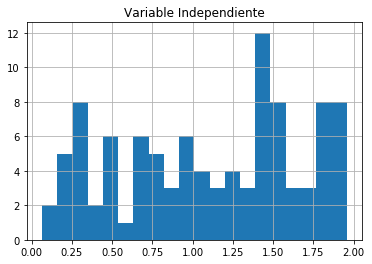

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

n_bins = 20
plt.title('Variable Independiente')
plt.hist(X, bins = n_bins)
plt.grid(True)
plt.show()
plt.clf()


Definamos y como una función lineal respecto de X pero con ruido aleatorio. Obviamente, en un ejemplo real no conocería la forma de y.

In [5]:
y = 4 + 3 * X + np.random.randn(100, 1)

Veamos como lucen los datos:

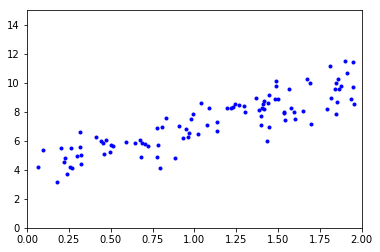

In [6]:
plt.plot(X, y, "b.") #"b." indica que grafique puntos sin unir mediente líneas
plt.axis([0, 2, 0, 15])
plt.show()

A simple vista se observa cierta dependencia. Pero supongamos que no sabemos como está definida "y" y tratemos de estimarla usando regresión lineal.
Primero, agreguemos a los datos el coefiente 1 para el término independiente:

In [7]:
X_b = np.c_[np.ones((100, 1)), X] 

Y ahora calculemos los valores de θ que minimizan el error en el ajuste:

In [8]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.02504519],
       [ 2.97242573]])

Listo, theta_best son los parámetros del modelo de regresión lineal que ajusté que minimizan el error (que lo definimos aleatoriamente). ¿Como uso theta_best para hacer una predicción?:

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.02504519],
       [ 9.96989666]])

Si lo grafico:

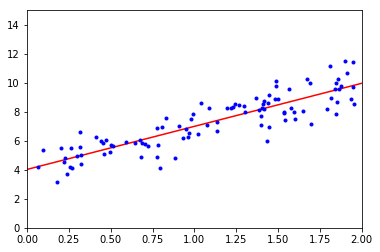

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## Calculo de $\theta$ mediante "*Descenso por gradiente*"

TODO: Mostrar como evoluciona el costo $J(\theta,X)$ a medida que avanza el algoritmo

## Usando Scikit-Learn

Hacer el cálculo "manual" funciona bien, pero el paquete "Scikit-Learn" es una mejor alternativa:

In [11]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.02504519]), array([[ 2.97242573]]))

Ahora la predicción:

In [12]:
y_predict = lin_reg.predict(X_new)

In [13]:
y_predict

array([[ 4.02504519],
       [ 9.96989666]])

## Usos típicos de la regresión lineal

TODO: ejemplos de uso típicos en los cuales me conviene usar regresión lineal por sobre otro tipo de modelo.
Adjuntar links a videos/documentación/bibliografía.

## Bibliografía

TODO: incluir videos y cursos online